# Практика 3

In [75]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [76]:
#Читаем файл
df = pd.read_csv("../data/Total annual rainfall in inches London England 1813  1912.csv")
df = df['x']
df.head()

0    23.56
1    26.07
2    21.86
3    31.24
4    23.65
Name: x, dtype: float64

Проверить ряд на стационарность

In [77]:
from statsmodels.tsa.stattools import adfuller

def test_dickey_fuller(ts, name="Снегопад", alpha=0.05):
    print(f'Тест Дики-Фуллера ряда {name} :')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")


<Axes: >

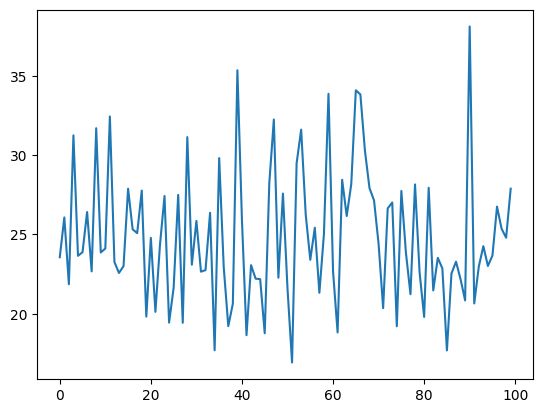

In [78]:
#График ряда с трендом и сезонностью
df.plot()

In [79]:
#Тест Дики-Фуллера для ряда с трендом и сезонностью
test_dickey_fuller(df)

Тест Дики-Фуллера ряда Снегопад :
Test Statistic                -1.050200e+01
p-value                        1.078001e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [80]:
# Создаем выборку без тренда
nottrend = []
s = 3

# Создаем выборку без сезонности
notseason = []

# выборка без тренда
for i in range(1, len(df)):
   nottrend.append(df[i] - df[i-1])

# выборка без сезонности
for i in range(s, len(df)):
   notseason.append(df[i] - df[i-s])

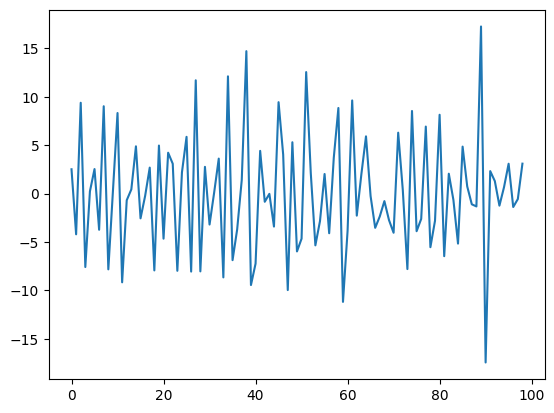

In [81]:
# Выводим график выборки без тренда
plt.plot(nottrend)

In [82]:
#Тест Дики-Фуллера для ряда без тренда
test_dickey_fuller(nottrend)

Тест Дики-Фуллера ряда Снегопад :
Test Statistic                -8.031102e+00
p-value                        1.957343e-12
#Lags Used                     5.000000e+00
Number of Observations Used    9.300000e+01
Critical Value (1%)           -3.502705e+00
Critical Value (5%)           -2.893158e+00
Critical Value (10%)          -2.583637e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


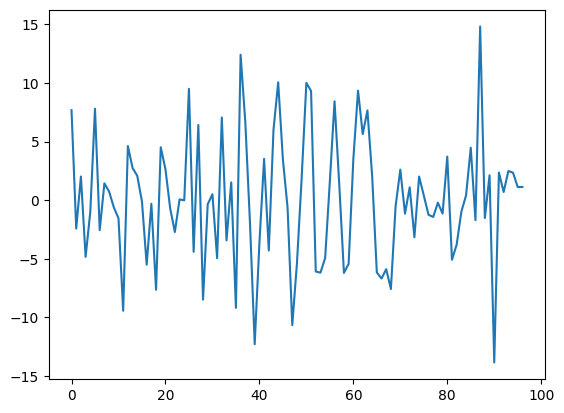

In [83]:
# Выводим график выборки без сезонности
plt.plot(notseason)

In [84]:
#Тест Дики-Фуллера для ряда без сезонности
test_dickey_fuller(notseason)

Тест Дики-Фуллера ряда Снегопад :
Test Statistic                 -5.004919
p-value                         0.000022
#Lags Used                      8.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Автокорреляция и частичная корелляция

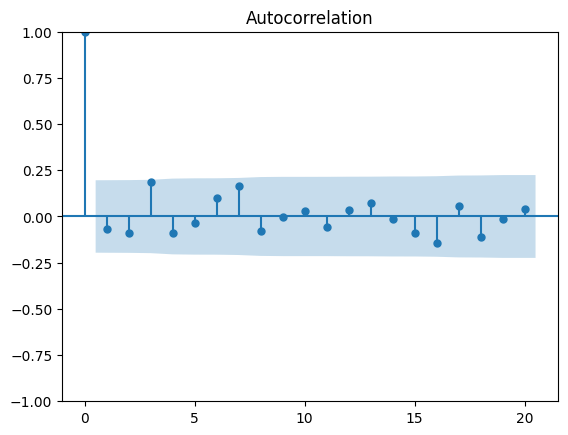

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

# Автокорреляция
plot_acf(df)
plt.show()

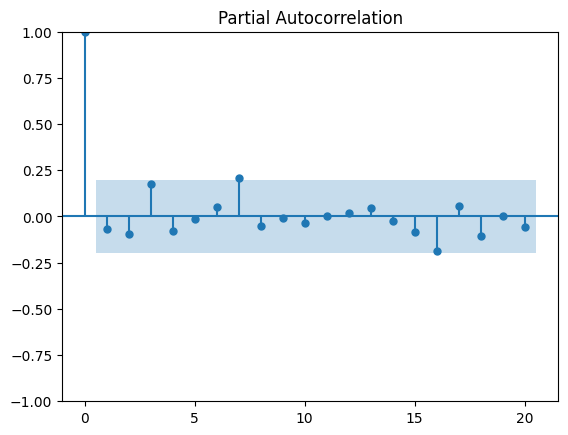

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf

# Частичная автокорреляция
plot_pacf(df)
plt.show()

AR модель

In [87]:
#Снвоа читаем файл
df = pd.read_csv("../data/Total annual rainfall in inches London England 1813  1912.csv")
df = df['x']

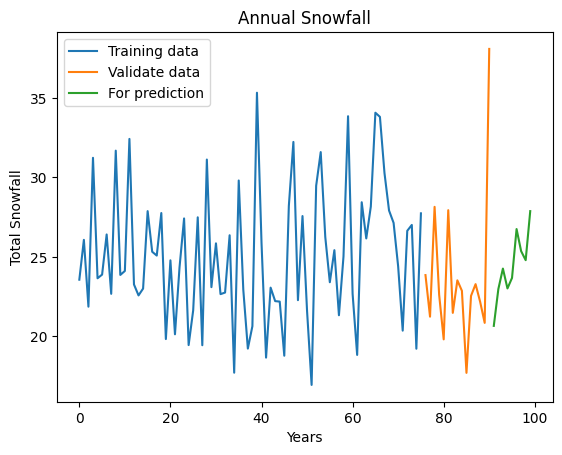

In [88]:
#Производим деление даынных на обучающую, валидационную и тестовую выборки

# Определяем размеры выборок
ln = len(df)
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# Делим данные на обучающую, валидационную и тестовую выборки
train_df = df[df.index<= train_cutoff]
validate_df = df[(df.index> train_cutoff) & (df.index<= validate_cutoff)]
forecast_df = df[df.index> validate_cutoff]

# Выводим график данных
plt.plot(train_df.index, train_df, label='Training data')
plt.plot(validate_df.index, validate_df, label='Validate data')
plt.plot(forecast_df.index, forecast_df, label='For prediction')
plt.legend()
plt.title('Annual Snowfall')
plt.ylabel('Total Snowfall')
plt.xlabel('Years')
plt.show()

# * Обучающая выборка - синим цветом
# * Валидационная выборка - оранжевым цветом
# * Предсказываемая выборка - зеленым цветом

In [89]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [90]:
# создаем объект модели на основе данных временного ряда с 3 лагами
mod = AutoReg(df, 3, old_names=False)
# обучаем
res = mod.fit()

# выводим сводку информации об авторегрессионной модели
print(res.summary())


# * Модель показывает, что все лаги, !кроме x.L3!, не являются статистически значимыми (P > 0.05)

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  100
Model:                     AutoReg(3)   Log Likelihood                -275.653
Method:               Conditional MLE   S.D. of innovations              4.149
Date:                Fri, 23 Feb 2024   AIC                            561.306
Time:                        15:08:00   BIC                            574.180
Sample:                             3   HQIC                           566.512
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9200      4.641      5.154      0.000      14.824      33.016
x.L1          -0.0528      0.100     -0.528      0.597      -0.249       0.143
x.L2          -0.0849      0.100     -0.851      0.3

In [91]:
# опять обучаем модель, но на этот раз указываем тип ковариационной оценки
res1 = mod.fit(cov_type="HC0")

# смотрим, что изменилось
print(res1.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  100
Model:                     AutoReg(3)   Log Likelihood                -275.653
Method:               Conditional MLE   S.D. of innovations              4.149
Date:                Fri, 23 Feb 2024   AIC                            561.306
Time:                        15:08:00   BIC                            574.180
Sample:                             3   HQIC                           566.512
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9200      5.340      4.479      0.000      13.454      34.387
x.L1          -0.0528      0.106     -0.497      0.619      -0.261       0.155
x.L2          -0.0849      0.099     -0.856      0.3

In [ ]:
# * В res, стандартные ошибки выше, чем в res1
# * P-значения коэффициентов в res1 ниже, чем в res, что указывает на большую статистическую значимость этих коэффициентов в res1.

In [92]:
sel = ar_select_order(df, 13, old_names=False)
sel.ar_lags
res2 = sel.model.fit()
print(res2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  100
Model:                     AutoReg(0)   Log Likelihood                -285.245
Method:               Conditional MLE   S.D. of innovations              4.193
Date:                Fri, 23 Feb 2024   AIC                            574.490
Time:                        15:08:00   BIC                            579.701
Sample:                             0   HQIC                           576.599
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8239      0.419     59.197      0.000      24.002      25.646


Смотрим, что он предсказал по res, res1 и res2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


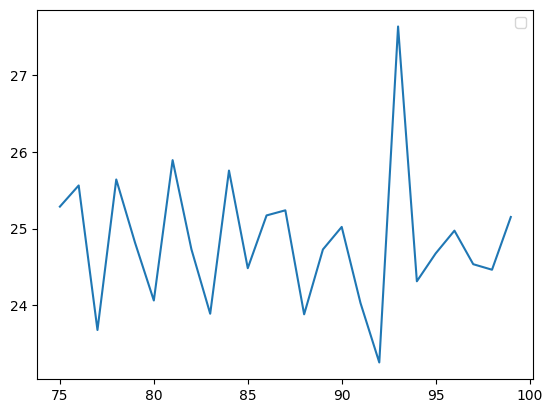

In [93]:
fig = res.plot_predict(train_cutoff)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


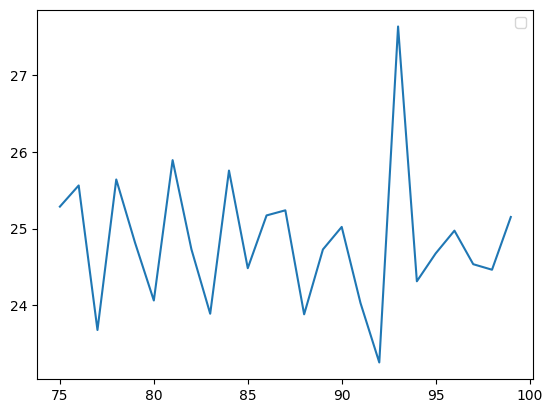

In [94]:
fig = res1.plot_predict(train_cutoff)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


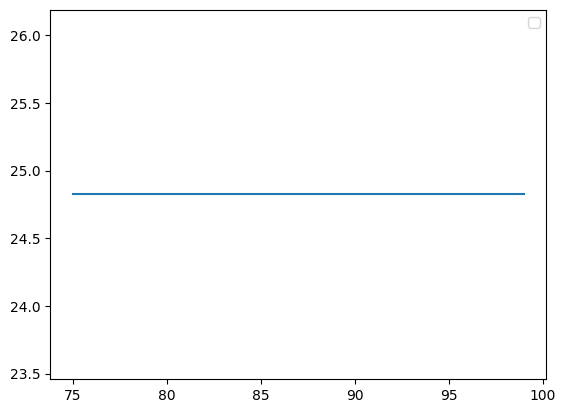

In [95]:
fig = res2.plot_predict(train_cutoff)

Результат предсказания с исп. res1

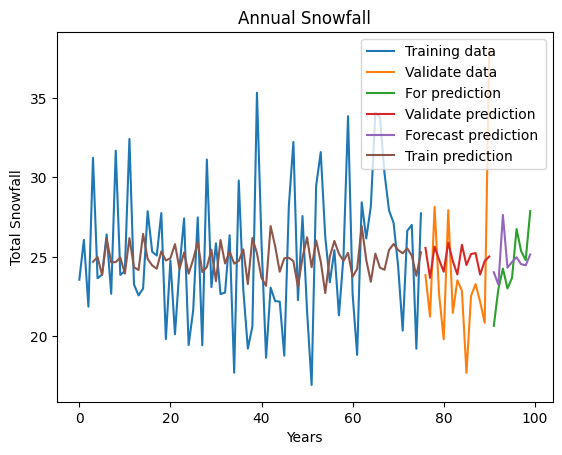

In [102]:
# Формируем предсказанные временные ряды

# Делаем прогноз на обучающей, валидационной и тестовой выборках
pred = res1.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res1.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res1.predict(start=validate_cutoff + 1, end=(len(df)-1), dynamic=False)

# Выводим график исходных данных и прогноза
plt.plot(train_df.index, train_df, label='Training data')
plt.plot(validate_df.index, validate_df, label='Validate data')
plt.plot(forecast_df.index, forecast_df, label='For prediction')
plt.plot(validate_df.index, v_pred, label='Validate prediction ')
plt.plot(forecast_df.index, f_pred, label='Forecast prediction')
plt.plot(train_df.index, pred, label='Train prediction')

plt.legend()
plt.title('Annual Snowfall')
plt.ylabel('Total Snowfall')
plt.xlabel('Years')
plt.show()

Результат предсказания с исп. res

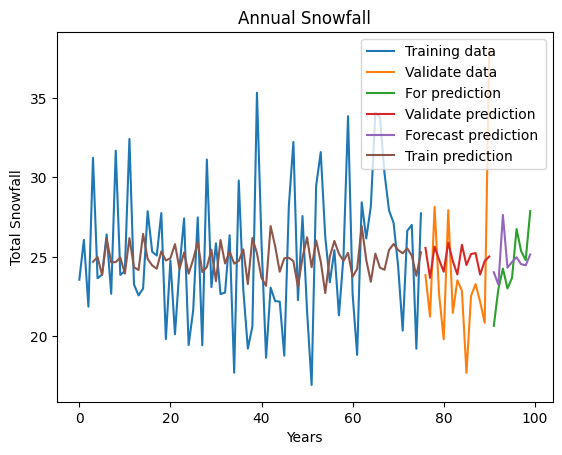

In [103]:
# Формируем предсказанные временные ряды

# Делаем прогноз на обучающей, валидационной и тестовой выборках
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(len(df)-1), dynamic=False)

# Выводим график исходных данных и прогноза
plt.plot(train_df.index, train_df, label='Training data')
plt.plot(validate_df.index, validate_df, label='Validate data')
plt.plot(forecast_df.index, forecast_df, label='For prediction')
plt.plot(validate_df.index, v_pred, label='Validate prediction ')
plt.plot(forecast_df.index, f_pred, label='Forecast prediction')
plt.plot(train_df.index, pred, label='Train prediction')

plt.legend()
plt.title('Annual Snowfall')
plt.ylabel('Total Snowfall')
plt.xlabel('Years')
plt.show()

In [ ]:
# * По имеющимся данным модели не предсказали пиковые значения осадков

Оценка метрик

In [ ]:
!pip install scikit-learn

In [106]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [110]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df, f_pred))
print("MAE:", mean_absolute_error(forecast_df, f_pred))
print("R2: ", r2_score(forecast_df, f_pred))

# * судя по метрикам - модель выдет низкую точность прогноза

RMSE: 2.0278864342217684
MAPE: 0.0693633844071655
MAE: 1.6671851196844298
R2:  0.007513279615341761
